## Total Offense and Total Defense Data Frames

Upload and present dataframes of team offense and team defense rankings, points for and points against for the 2018 season.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# File to Load (Offense First)
file_to_load = "Data Sources/Total Offense.csv"

# Read Offense  File and store into Pandas data frame
Offense_data = pd.read_csv(file_to_load)
Offense_data.head()

,Rk,Team,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1,Kansas City Chiefs,16,565,6810,996,6.8,18,6,384,...,1855,16,4.8,108,137,1152,37,52.6,10.5,298.14
1,2,Los Angeles Rams,16,527,6738,1060,6.4,19,7,401,...,2231,23,4.9,134,96,878,31,48.6,9.8,239.79
2,3,New Orleans Saints,16,504,6067,1010,6.0,16,9,377,...,2025,26,4.3,134,94,939,33,51.8,9.5,237.73
3,4,New England Patriots,16,436,6295,1073,5.9,18,7,365,...,2037,18,4.3,131,93,744,28,40.8,9.2,190.96
4,5,Indianapolis Colts,16,433,6179,1070,5.8,24,9,371,...,1718,13,4.2,96,120,953,38,41.2,13.2,140.47


In [2]:
# File to Load (Defense)
file_to_load = "Data Sources/Team Defense.csv"

# Read Defense File and store into Pandas data frame
Defense_data = pd.read_csv(file_to_load)
Defense_data.head()

,Rk,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1,Chicago Bears,16,283,4795,1004,4.8,36,9,278,...,1280,5,3.8,67,114,1022,25,28.6,19.5,95.5
1,2,Baltimore Ravens,16,287,4687,974,4.8,17,5,286,...,1327,11,3.7,82,113,1017,30,29.1,9.5,39.88
2,3,Tennessee Titans,16,303,5334,1001,5.3,17,6,298,...,1863,9,4.3,98,120,984,18,33.1,9.9,-22.13
3,4,Jacksonville Jaguars,16,316,4983,970,5.1,17,6,288,...,1870,16,4.3,89,92,735,37,33.1,8.3,4.66
4,5,Houston Texans,16,316,5490,1022,5.4,29,14,298,...,1323,8,3.4,76,117,945,22,31.6,13.9,-10.29


## Build Custom Data Frames of Offense and Defense, and combine into one dataframe

In [3]:
#Offense Data Frame
Offense_DF = Offense_data[["Rk", "Team","PF","Yds"]]
Offense_DF.head()

,Rk,Team,PF,Yds
0,1,Kansas City Chiefs,565,6810
1,2,Los Angeles Rams,527,6738
2,3,New Orleans Saints,504,6067
3,4,New England Patriots,436,6295
4,5,Indianapolis Colts,433,6179


In [4]:
#Rename Column Headers
Offense_DF = Offense_DF.rename(columns={'Rk': 'Offensive Rank', "PF": "Points Scored", "Yds": "Yards Gained"})
Offense_DF.head()

,Offensive Rank,Team,Points Scored,Yards Gained
0,1,Kansas City Chiefs,565,6810
1,2,Los Angeles Rams,527,6738
2,3,New Orleans Saints,504,6067
3,4,New England Patriots,436,6295
4,5,Indianapolis Colts,433,6179


In [5]:
#Defense Data Frame
Defense_DF = Defense_data[["Rk", "Tm","PF","Yds"]]
Defense_DF.head()

,Rk,Tm,PF,Yds
0,1,Chicago Bears,283,4795
1,2,Baltimore Ravens,287,4687
2,3,Tennessee Titans,303,5334
3,4,Jacksonville Jaguars,316,4983
4,5,Houston Texans,316,5490


In [6]:
#Rename Column Headers
Defense_DF = Defense_DF.rename(columns={'Rk': 'Defensive Rank', "PF": "Points Against", "Yds": "Yards Forfeited", 'Tm': 'Team'})
Defense_DF.head()

,Defensive Rank,Team,Points Against,Yards Forfeited
0,1,Chicago Bears,283,4795
1,2,Baltimore Ravens,287,4687
2,3,Tennessee Titans,303,5334
3,4,Jacksonville Jaguars,316,4983
4,5,Houston Texans,316,5490


In [7]:
#Merge Tables for Summarized View

Combined_Rankings = pd.merge(Offense_DF, Defense_DF, on="Team", how="inner")
Combined_Rankings.head()

,Offensive Rank,Team,Points Scored,Yards Gained,Defensive Rank,Points Against,Yards Forfeited
0,1,Kansas City Chiefs,565,6810,24,421,6488
1,2,Los Angeles Rams,527,6738,20,384,5737
2,3,New Orleans Saints,504,6067,14,353,5585
3,4,New England Patriots,436,6295,7,325,5746
4,5,Indianapolis Colts,433,6179,10,344,5435


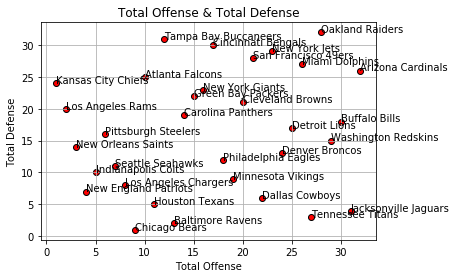

In [8]:
#Plot Total Offense and Total Defense, label each team

Combined_Rankings["Offensive Rank"] = Combined_Rankings["Offensive Rank"].astype(float)
Combined_Rankings["Defensive Rank"] = Combined_Rankings["Defensive Rank"].astype(float) 

OFF = Combined_Rankings["Offensive Rank"]
DEF = Combined_Rankings["Defensive Rank"]

plt.scatter(OFF,DEF,marker="o", facecolors="red", edgecolors="black")
plt.title("Total Offense & Total Defense")
plt.xlabel("Total Offense")
plt.ylabel("Total Defense")
plt.grid()

for i, txt in enumerate(Combined_Rankings.Team):
    plt.annotate(txt, (OFF[i], DEF[i]))


In [9]:
#4th Quarter Points Surrendered

Q4_pts_file_to_load = "Data Sources/4th Qtr Points Surrendered.csv"

# Read 4th Quarter Points File and store into Pandas data frame
Q4_data = pd.read_csv(Q4_pts_file_to_load)
Q4_data.head()


,Rank,Team,2018,Last 3,Last 1,Home,Away,2017
0,1,Tennessee,3.9,4.0,9,2.8,5.0,8.1
1,2,Baltimore,4.1,7.0,11,4.6,3.5,4.6
2,3,Denver,4.1,8.7,9,5.4,2.9,6.0
3,4,Houston,4.2,3.0,0,2.9,5.8,6.4
4,5,New Orleans,4.9,3.0,6,4.3,5.8,7.8


In [47]:
Clutch = Q4_data[["Rank", "Team", "2018"]]
Clutch.head()

,Rank,Team,2018
0,1,Tennessee,3.9
1,2,Baltimore,4.1
2,3,Denver,4.1
3,4,Houston,4.2
4,5,New Orleans,4.9


In [11]:
#2nd Half Points Surrendered
SecHlf_pts_file_to_load = "Data Sources/Second Half Points Surrendered.csv"

# Read Second Half Points File and store into Pandas data frame
SecHlf_data = pd.read_csv(SecHlf_pts_file_to_load)
Second_Half = SecHlf_data[["Rank", "Team", "2018"]] 
Second_Half.head()



,Rank,Team,2018
0,1,Baltimore,7.2
1,2,Tennessee,7.8
2,3,Buffalo,8.9
3,4,Denver,9.2
4,5,New Orleans,9.3


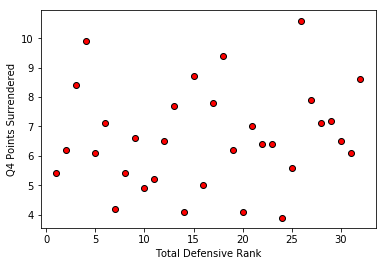

In [53]:
#idea of the chart works, the data labels do to work yet

Win_Time = Clutch["2018"]
plt.scatter(DEF,Win_Time,marker="o", facecolors="red", edgecolors="black")

plt.xlabel("Total Defensive Rank")
plt.ylabel("Q4 Points Surrendered")

plt.show()

In [18]:
#add total defense and total ofense, divide by two, see what their win total is against their combined value, 
#could that change when including covering the spread?